In [14]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

import scanpy as sc

In [15]:
adata = sc.read('brain_downsampled5000_integrated.h5ad')
groups = adata.obs.groupby('dataset').indices
ZE = adata[groups['Zeisel']]

In [16]:
ZE.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,original,scArches,original2,dataset,scArches2
10X28_3_TCAGCGCTAGATGA-1-2-0,10X28,2349.0,1334,Astrocytes-Zeisel,astrocyte-Zeisel,Astrocyte-Zeisel,Zeisel,astrocyte
10X22_3_AGTGACACCTCGAA-1-2-0,10X22,1001.0,671,Astrocytes-Zeisel,astrocyte-Zeisel,Astrocyte-Zeisel,Zeisel,astrocyte
10X52_5_TTAGTGAGTCTG--2-0,10X52,1768.0,1061,Astrocytes-Zeisel,astrocyte-Zeisel,Astrocyte-Zeisel,Zeisel,astrocyte
10X49_4_GAAGGATGCTAG--2-0,10X49,2040.0,1162,Astrocytes-Zeisel,astrocyte-Zeisel,Astrocyte-Zeisel,Zeisel,astrocyte
10X22_4_AGGGCGCTAGCCTA-1-2-0,10X22,1301.0,777,Astrocytes-Zeisel,astrocyte-Zeisel,Astrocyte-Zeisel,Zeisel,astrocyte


In [17]:
X = pd.DataFrame(data = ZE.X, index = ZE.obs_names, columns=ZE.var_names)
Y = pd.DataFrame(data = ZE.obs['original'].values)[0]
print("shape of data: ", X.shape)
print("shape of labels: ", Y.shape)

shape of data:  (85621, 2000)
shape of labels:  (85621,)


In [18]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)

(85621, 30)


In [19]:
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

shape of train set:  (68496, 2000)  and labels:  (68496, 30) 

shape of test set:  (17125, 2000)  and labels:  (17125, 30) 

Shape of train and validation set to check for overfitting
shape of train set:  (61646, 2000)  and labels:  (61646, 30) 

shape of validation set:  (6850, 2000)  and labels:  (6850, 30)


## Linear SVM performance

shape of labels in training set:  (68496,)
shape of labels in test set:  (17125,)


/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training time: 498.9086389541626
Predict time: 1.151108741760254
Accuracy of test set:  0.9723211678832117
F1-score of test set:  0.9722683376621176
Precision of test set: 0.9723287234184269
Recall of test set: 0.9723211678832117
Classification report of test set:
                                                     precision    recall  f1-score   support

                                 Astrocytes-Zeisel       0.96      0.97      0.97      1000
                         Cerebellum neurons-Zeisel       0.97      0.97      0.97      1000
      Cholinergic and monoaminergic neurons-Zeisel       0.96      0.96      0.96       214
                   Choroid epithelial cells-Zeisel       0.92      1.00      0.96        92
              Dentate gyrus granule neurons-Zeisel       0.96      0.98      0.97       874
       Dentate gyrus radial glia-like cells-Zeisel       0.85      0.82      0.83        65
   Di- and mesencephalon excitatory neurons-Zeisel       0.96      0.96      0.96      10

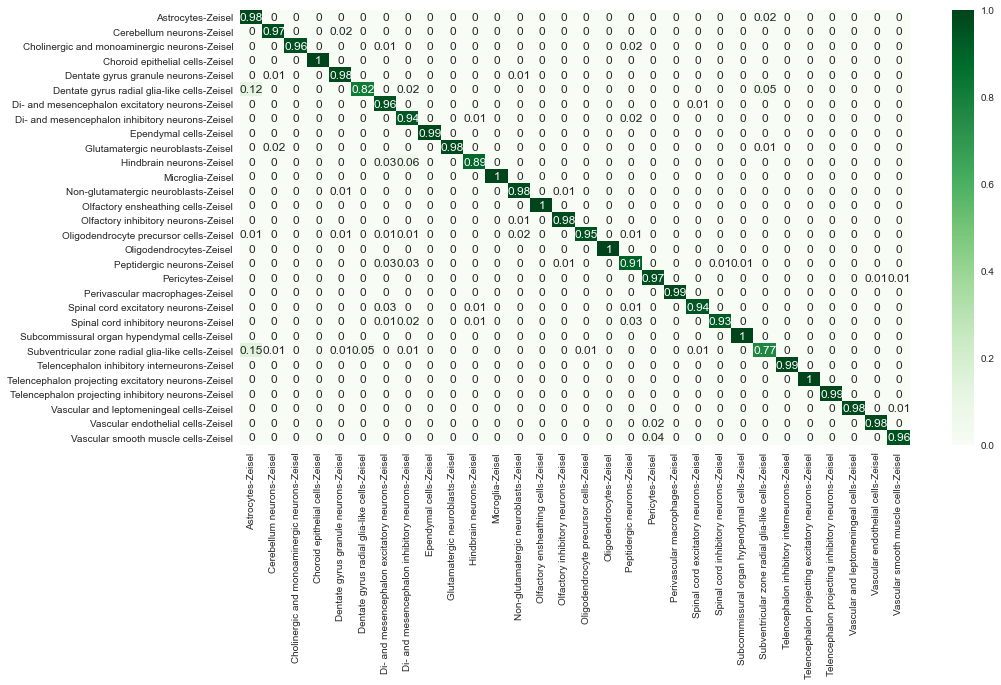

In [20]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)

start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start
print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

## MLP performance

Train the model to check for overfitting


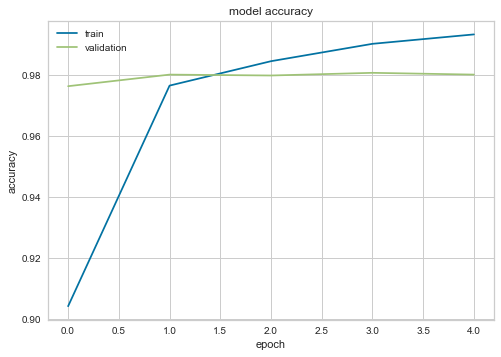

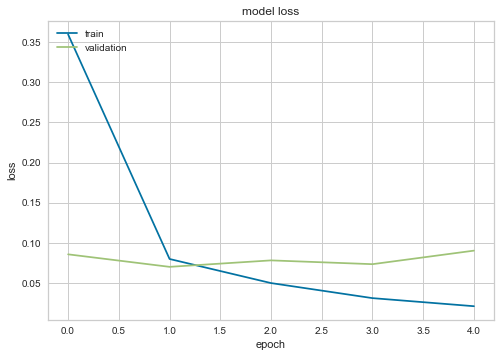

train the final model
Epoch 1/5
2141/2141 [==============================] - 23s 11ms/step - loss: 0.0244 - accuracy: 0.9934
Epoch 2/5
2141/2141 [==============================] - 18s 9ms/step - loss: 0.0128 - accuracy: 0.9963
Epoch 3/5
2141/2141 [==============================] - 19s 9ms/step - loss: 0.0101 - accuracy: 0.9968
Epoch 4/5
2141/2141 [==============================] - 20s 9ms/step - loss: 0.0077 - accuracy: 0.9974
Epoch 5/5
2141/2141 [==============================] - 18s 8ms/step - loss: 0.0066 - accuracy: 0.9979
Training time: 100.8696231842041
Predict time: 2.4850380420684814
The results are as follows:
Accuracy of test set:  0.9824817518248176
F1-score of test set:  0.9823405414506143
Precision of test set: 0.9825847376456055
Recall of test set: 0.9824817518248176
Classification report of test set:
                                                     precision    recall  f1-score   support

                                 Astrocytes-Zeisel       0.95      1.00      0.

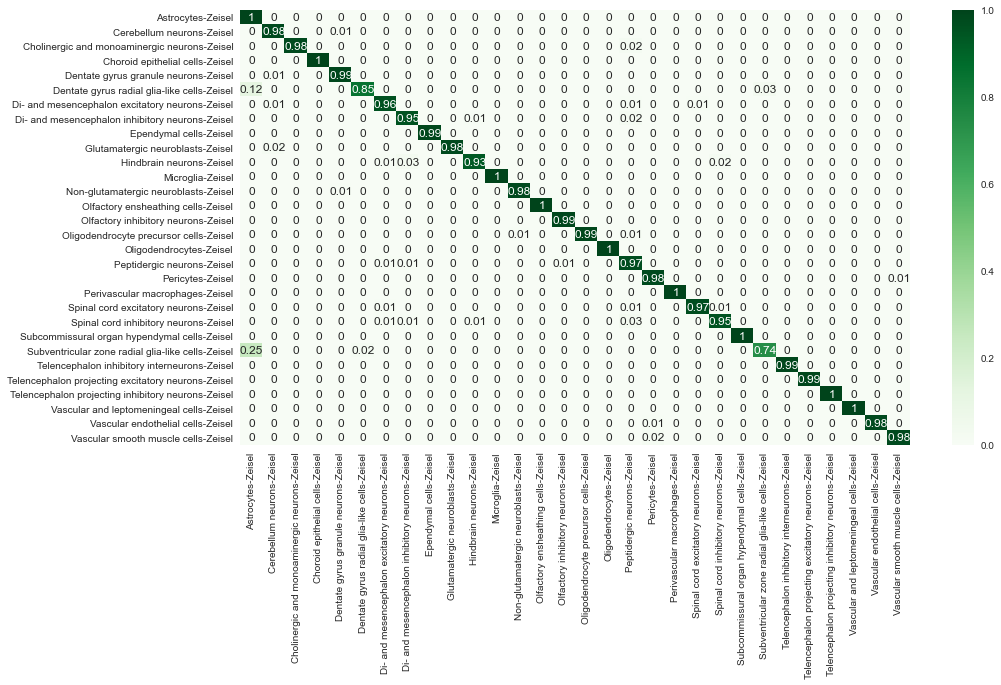

In [10]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## 1D-CNN performance

Train the model to check for overfitting


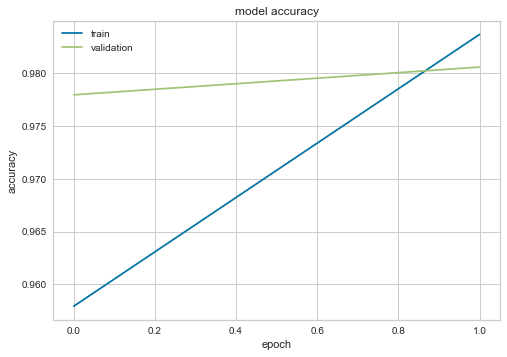

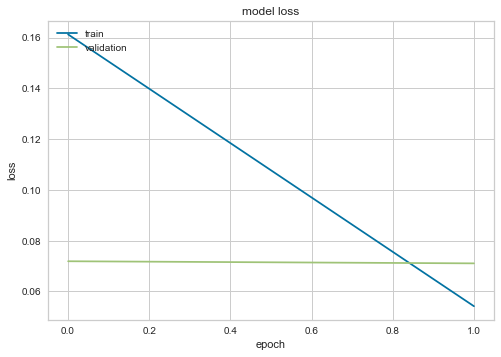

train the final model
Epoch 1/2
2141/2141 [==============================] - 310s 145ms/step - loss: 0.0338 - accuracy: 0.9894
Epoch 2/2
2141/2141 [==============================] - 343s 160ms/step - loss: 0.0206 - accuracy: 0.9934
Training time: 656.7380437850952
Predict time: 16.41024088859558
The results are as follows:
Accuracy of test set:  0.9826569343065693
F1-score of test set:  0.9825759876812991
Precision of test set: 0.9826539533343948
Recall of test set: 0.9826569343065693
Classification report of test set:
                                                     precision    recall  f1-score   support

                                 Astrocytes-Zeisel       0.97      0.99      0.98      1000
                         Cerebellum neurons-Zeisel       0.98      0.98      0.98      1000
      Cholinergic and monoaminergic neurons-Zeisel       0.98      0.98      0.98       214
                   Choroid epithelial cells-Zeisel       1.00      1.00      1.00        92
             

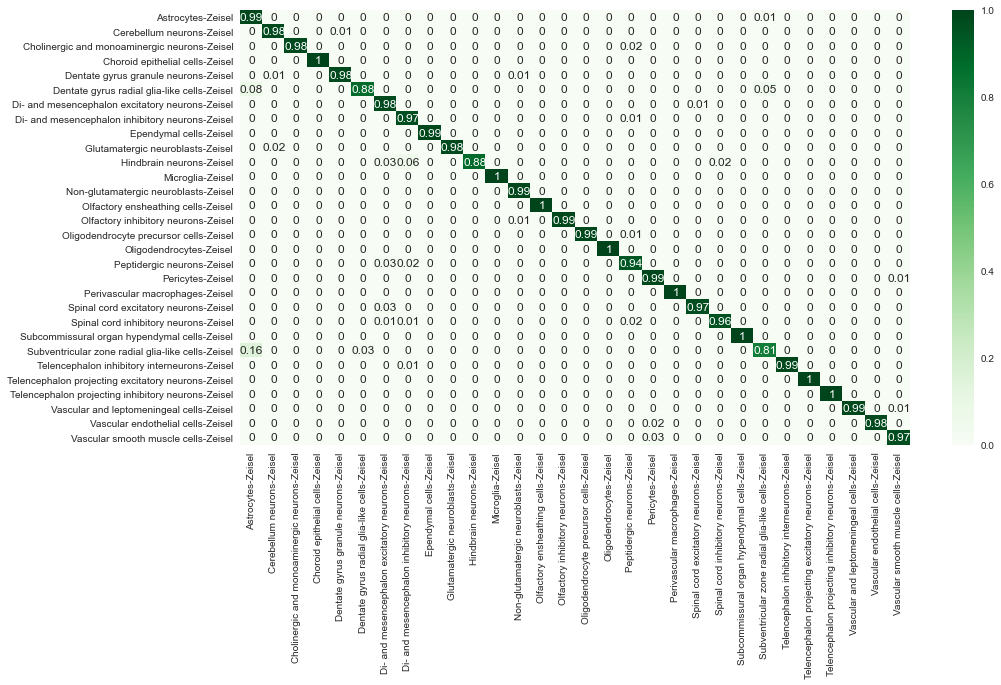

In [11]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)